In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [30]:
data = pd.read_fwf('slump_test.data')
col_name = data.columns[0].split(',')
data = data[data.columns[0]]
data.head()

0       1,273,82,105,210,9,904,680,23,62,34.99
1      2,163,149,191,180,12,843,746,0,20,41.14
2      3,162,148,191,179,16,840,743,1,20,41.81
3    4,162,148,190,179,19,838,741,3,21.5,42.08
4     5,154,112,144,220,10,923,658,20,64,26.82
Name: No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive, dtype: object

In [53]:
data_temp = list(data)
data_split = []
for i in data_temp:
    data_split.append(i.split(','))
df = pd.DataFrame(data_split, columns = col_name)
df.to_csv('slump_test.csv')

In [54]:
df = pd.read_csv('slump_test.csv')
df.head()

,Unnamed: 0,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive
0,0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [56]:
df.drop(['Unnamed: 0', 'No'], axis = 1, inplace = True)

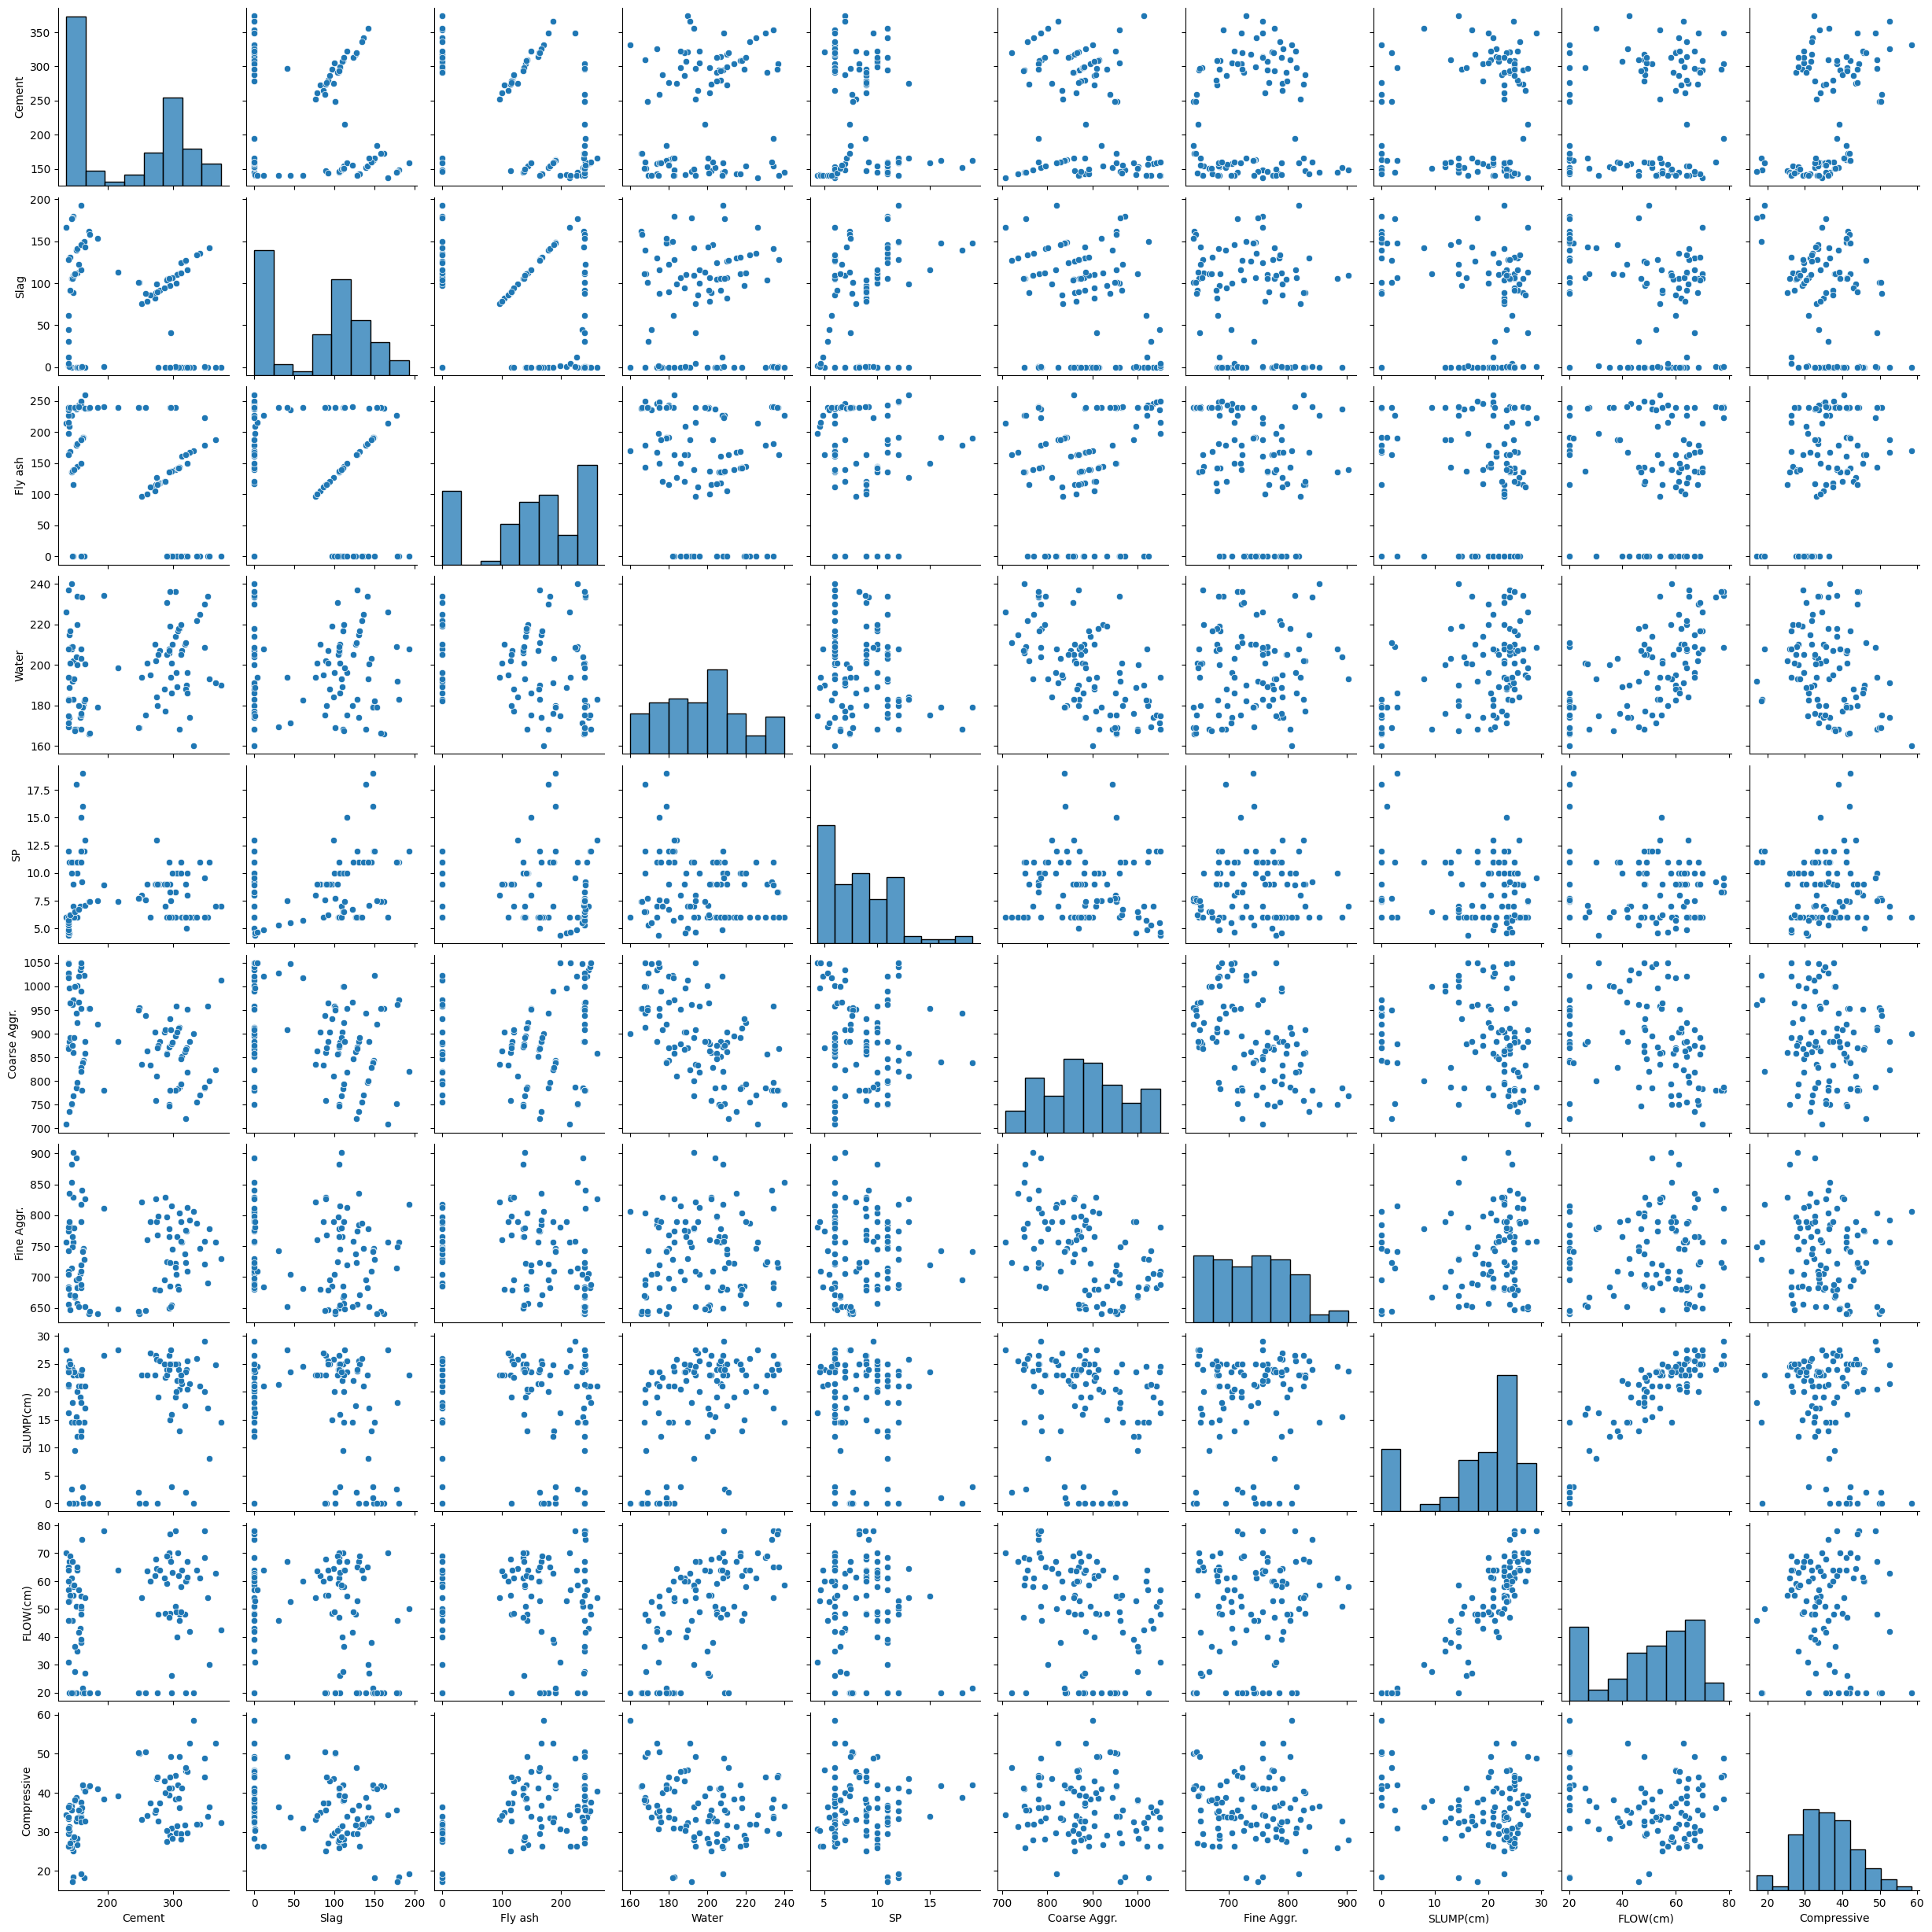

In [57]:
sns.pairplot(df)

In [58]:
xtr = 

103